In [0]:
!ls "/content/drive/My Drive"

'ARMinstruction (1).gslides'
'asphalt 8.gdoc'
 brain-mri-images-for-brain-tumor-detection.zip
 CamReadyBlockDiagram.gdoc
 CamReadyBlockDiagram.pdf
'Colab Notebooks'
'DBMS Project Review 1.gdoc'
'ER-Diagram (1).xml'
'Essay (1).gdoc'
 Essay.gdoc
'General presentation.gslides'
'Project proposal (1).gdoc'
'Project proposal (2).gdoc'
'Project proposal (3).gdoc'
'Project proposal.gdoc'
'P.Vamsi Krishna (AM.EN.U4CSE17152) version2.pdf'
'SSR project proposal .docx'
'STUDENT SOCIAL RESPONSIBILITY (SSR).pptm'
'Untitled document (1).gdoc'
'Untitled document.gdoc'


In [0]:
!unzip -q "/content/drive/My Drive/brain-mri-images-for-brain-tumor-detection.zip"

In [0]:
!pip install imutils

In [0]:
import numpy as np 
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop

In [0]:
!mkdir TRAIN TEST VAL TRAIN/yes TRAIN/no TEST/yes TEST/no VAL/yes VAL/no

In [0]:
from os import listdir
img_path ='brain_tumor_dataset/'
# split the data by train/val/test
for File in listdir(img_path):
    
        img_num = len(listdir(img_path + File))
        for (n, File_name) in enumerate(listdir(img_path + File)):
            img = img_path + File + '/' + File_name
            if n < 5:
                shutil.copy(img, 'TEST/' + File + '/' + File_name)
            elif n < 0.8*img_num:
                shutil.copy(img, 'TRAIN/'+ File + '/' + File_name)
            else:
                shutil.copy(img, 'VAL/'+ File + '/' + File_name)

In [0]:
!pip install --user cython h5py

In [0]:
!pip install --user git+https://github.com/Theano/Theano.git

  Cloning https://github.com/Theano/Theano.git to /tmp/pip-req-build-x796glu5
  Running command git clone -q https://github.com/Theano/Theano.git /tmp/pip-req-build-x796glu5
  Created wheel for Theano: filename=Theano-1.0.4+51.gf1e4ec47c-cp36-none-any.whl size=2667983 sha256=1c292e3dd9e539f801da5af50a99c0c2074e28fdf56442b108e5fa9885b6cc76
  Stored in directory: /tmp/pip-ephem-wheel-cache-8xgyomct/wheels/14/72/17/35fc1366380e8e05fc8ed5d44e24a2da28ef975aa4be6aaa17
Successfully built Theano
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [0]:
!pip install --user git+https://github.com/fchollet/keras.git

  Cloning https://github.com/fchollet/keras.git to /tmp/pip-req-build-wdgw1wsc
  Running command git clone -q https://github.com/fchollet/keras.git /tmp/pip-req-build-wdgw1wsc
  Created wheel for Keras: filename=Keras-2.3.1-cp36-none-any.whl size=365124 sha256=b0830777a330dbf3eb83b8eb12aed9c6ac1a226a1233ec0543b637fc807c2266
  Stored in directory: /tmp/pip-ephem-wheel-cache-xzvqqum7/wheels/9b/28/23/374425566fc615b7eeb7d748899ed3ce8d72851e4b5d22cc83
Successfully built Keras


In [0]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.3.1


In [0]:
!git clone https://github.com/heuritech/convnets-keras.git

Cloning into 'convnets-keras'...
remote: Enumerating objects: 247, done.
remote: Total 247 (delta 0), reused 0 (delta 0), pack-reused 247
Receiving objects: 100% (247/247), 3.59 MiB | 2.82 MiB/s, done.
Resolving deltas: 100% (142/142), done.


In [0]:
%cd convnets-keras
!sudo python setup.py install

/content/convnets-keras
running install
running build
running build_py
creating build
creating build/lib
creating build/lib/convnetskeras
copying convnetskeras/imagenet_tool.py -> build/lib/convnetskeras
copying convnetskeras/__init__.py -> build/lib/convnetskeras
copying convnetskeras/customlayers.py -> build/lib/convnetskeras
copying convnetskeras/convnets.py -> build/lib/convnetskeras
creating build/lib/convnetskeras/data
copying convnetskeras/data/meta_clsloc.mat -> build/lib/convnetskeras/data
running install_lib
creating /usr/local/lib/python3.6/dist-packages/convnetskeras
creating /usr/local/lib/python3.6/dist-packages/convnetskeras/data
copying build/lib/convnetskeras/data/meta_clsloc.mat -> /usr/local/lib/python3.6/dist-packages/convnetskeras/data
copying build/lib/convnetskeras/imagenet_tool.py -> /usr/local/lib/python3.6/dist-packages/convnetskeras
copying build/lib/convnetskeras/__init__.py -> /usr/local/lib/python3.6/dist-packages/convnetskeras
copying build/lib/convnetske

In [0]:
img_size = [224,224]
data_path = 'TRAIN/'

In [0]:
!pip install Merge


  Created wheel for Merge: filename=merge-1.0.0-cp36-none-any.whl size=1494 sha256=ff2844cc9bc42fede94d2106cc1d02661e0f4bdd5c0e3da60c784779eaddf3f7
  Stored in directory: /root/.cache/pip/wheels/6d/c7/7d/efe551f409cdd4572ece7ae7b9f96dacccae332fe2b1d386b3
Successfully built Merge


In [0]:
vgg_19_model = VGG19(input_shape= img_size+[3],weights='imagenet',include_top=False)

In [0]:
from keras.layers import GlobalMaxPooling2D
x = vgg_19_model.output
x

<tf.Tensor 'block5_pool_1/MaxPool:0' shape=(None, 7, 7, 512) dtype=float32>

In [0]:
x = GlobalMaxPooling2D()(x)

In [0]:
from keras.layers import Dense
x = Dense(512,activation = 'relu')(x)
x = Dense(512,activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)

In [0]:
predictions = Dense(2,activation='softmax')(x)

In [0]:
model = Model(inputs = vgg_19_model.input, outputs = predictions)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
for layer in vgg_19_model.layers:
   layer.trainable = False

In [0]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [0]:
train_generator = train_datagen.flow_from_directory('TRAIN', target_size=(224,224), color_mode='rgb', batch_size=32, class_mode='categorical',shuffle = False)

Found 193 images belonging to 2 classes.


In [0]:
!pwd


/root


In [0]:
%cd ../

/


In [0]:
%cd content

/content


In [0]:
model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [0]:
print('total images to be trained ',train_generator.n)

total images to be trained  193


In [0]:
print('batch size set', train_generator.batch_size)

batch size set 32


In [0]:
print('no of steps per epoch', train_generator.n//train_generator.batch_size)

no of steps per epoch 6


In [0]:
fit_model = model.fit_generator(train_generator, steps_per_epoch=6,epochs = 4)

Epoch 1/4
6/6 [==============================] - 101s 17s/step - loss: 1.0178 - accuracy: 0.6832
Epoch 2/4
6/6 [==============================] - 101s 17s/step - loss: 0.4640 - accuracy: 0.8758
Epoch 3/4
6/6 [==============================] - 121s 20s/step - loss: 0.2953 - accuracy: 0.9010
Epoch 4/4
6/6 [==============================] - 102s 17s/step - loss: 0.1909 - accuracy: 0.9317


In [0]:
print(fit_model.history.keys())

dict_keys(['loss', 'accuracy'])


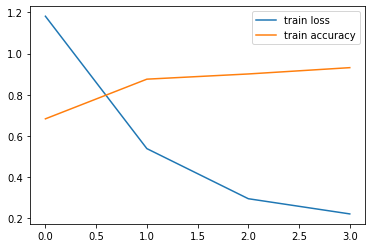

In [0]:
plt.plot(fit_model.history['loss'], label='train loss')
plt.plot(fit_model.history['accuracy'], label='train accuracy')
plt.legend()
plt.show()


In [0]:
plt.savefig('performance_of_model')

<Figure size 432x288 with 0 Axes>

In [0]:
model.save('brain_tumour_classifier.h5')

In [0]:
from keras.preprocessing import image
from keras.models import load_model

In [0]:
model = load_model('brain_tumour_classifier.h5')

In [0]:
test_image = image.load_img('TEST/yes/Y148.JPG',target_size=(224,224))
tst = image.img_to_array(test_image)
tst = np.expand_dims(tst,axis=0)

In [0]:
test_data = preprocess_input(tst)

In [0]:
result = model.predict(test_data)
print(result)

[[1.9631217e-11 1.0000000e+00]]


In [0]:
if result[0][0] == 1:
  print('No brain tumor')
elif result[0][1] == 1:
  print('Brain tumor is present in ' + 'TEST/yes/Y148.JPG')

Brain tumor is present in TEST/yes/Y148.JPG
